## The SIR Epidemic Model

We recall the model:


$\begin{eqnarray}
    S'(t) &=& -\beta S(t)I(t), \nonumber \\
    I'(t) &=& \beta S(t)I(t) - \alpha I(t),\\
    R'(r) &=& \alpha I(t).
\end{eqnarray}$


We pose

$X = (S \text{ } I \text{ }R)^T$

And our differential system is:

$X'= (S'(t) \text{ } I'(t) \text{ } R'(t))^T = f(X)$

In [1]:
#useful libraries
import numpy as np
from scipy.integrate import odeint
import scipy.optimize as optimize
from scipy.interpolate import make_interp_spline, BSpline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [6]:
#setting parameters
# Total population, N.
N = 763
# Initial number of infected and recovered individuals, I3 and R3.
I3, R3 = 25, 0
# Everyone else, S3, is susceptible to infection initially.
S3 = N - I3 - R3
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, alpha = 0.0025, 0.3
#A grid of time points (in days)
tmax = 30
Nt = 30
# A grid of time points (in days)
t = np.linspace(0, tmax, Nt+1)
params = [763.0, 0.0025, 0.3]

# The SIR model differential equations
def deriv(X, t, N, beta, alpha):
    S, I, R = X
    dSdt = -beta * S * I
    dIdt = beta * S * I - alpha * I
    dRdt = alpha * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
X3 = S3, I3, R3
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, X3, t, args=(N, beta, alpha))
S, I, R = ret.T

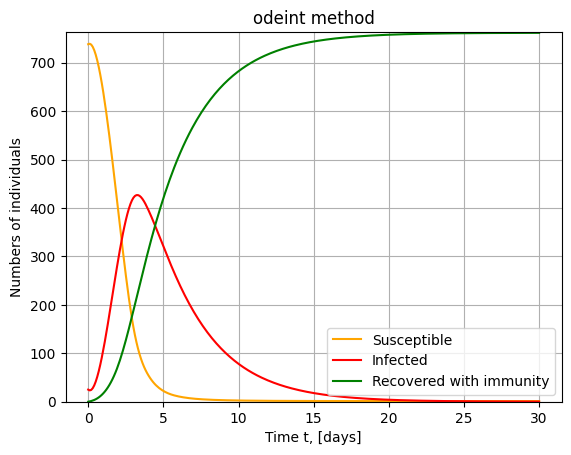

In [7]:
# 300 represents number of points to make between T.min and T.max
xnew = np.linspace(t.min(), t.max(), 300)
spl_S = make_interp_spline(t, S, k=3)  # type: BSpline
power_smooth_S = spl_S(xnew)
spl_I = make_interp_spline(t, I, k=3)  # type: BSpline
power_smooth_I = spl_I(xnew)
spl_R = make_interp_spline(t, R, k=3)  # type: BSpline
power_smooth_R = spl_R(xnew)

#plt.plot(xnew,power_smooth)
plt.figure()
plt.grid()
plt.title("odeint method")
plt.plot(xnew, power_smooth_S, 'orange', label='Susceptible')
plt.plot(xnew, power_smooth_I, 'r', label='Infected')
plt.plot(xnew, power_smooth_R, 'g', label='Recovered with immunity')
plt.xlabel('Time t, [days]')
plt.ylabel('Numbers of individuals')
plt.ylim([0,N])
plt.legend()

plt.show();